In [10]:
# create bankend for Qiskit's AER (QSAM simulator)
from qiskit import Aer
aer_sim = Aer.get_backend('qasm_simulator')
import os
import threading
ionq_token="LAYq6EwdvXqh4sIma2iKZNQ2l7KzbxX6"
from qiskit_ionq import IonQProvider
from qiskit import QuantumCircuit, execute
from threading import Thread, Lock
provider = IonQProvider(ionq_token)

# show supported backends
print(provider.backends()) 

# create backends for simulator and hardware
backend_sim = provider.get_backend("ionq_simulator")
backend_qpu = provider.get_backend("ionq_qpu")



[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


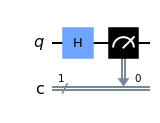

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

qc.draw(output='mpl')

In [52]:
#generates 100 million bits, storing the memory in order to preserve the distribution of the numbers
def gen_100M(filename):
    job = execute(qc, backend = aer_sim, shots = 100000000, memory = True)
    results = job.result()
    memory = results.get_memory(qc)
    
    #Now adding the measurement results to a .txt file
    bits = open(filename, "w")
    
    for bit in memory:
        bits.write(str(bit))
    
    print("Number of bits generated:",len(memory))
    print("Memory saved to:", filename)
    
    

In [53]:
import time

start = time.time()
gen_100M("non_threaded.txt")
t_no_thread = time.time() - start

Number of bits generated: 100000000
Memory saved to: non_threaded.txt


In [54]:
print(f"Time to generate 100M bits using 100M shots: {t_no_thread} seconds")

Time to generate 100M bits using 100M shots: 583.348198890686 seconds


In [55]:
#Now we can introduce threading. We first need to make a modification to our function. We add a lock to prevent a data
#race as the threads have a globally shared filed they are outputting to. We reduce the shots by 1/10 and have 10 
#threads so the same number of bits are generated through each method.
lock = Lock()

def gen_10M():
    job = execute(qc, backend = aer_sim, shots = 10000000, memory = True)
    results = job.result()
    memory = results.get_memory(qc)
    
    #Now adding the measurement result to a .txt file (using lock now)
    lock.acquire()
    bits = open("threaded.txt", "a")
    
    for bit in memory:
        bits.write(str(bit))
    
    lock.release()

In [56]:
import time

start = time.time()

t1 = Thread(target = gen_10M)
t2 = Thread(target = gen_10M)
t3 = Thread(target = gen_10M)
t4 = Thread(target = gen_10M)
t5 = Thread(target = gen_10M)
t6 = Thread(target = gen_10M)
t7 = Thread(target = gen_10M)
t8 = Thread(target = gen_10M)
t9 = Thread(target = gen_10M)
t10 = Thread(target = gen_10M)

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()

duration = time.time() - start

print(f"Time to generate 100M bits using 10 threads at 10M shots each: {duration} seconds")

Time to generate 100M bits using 10 threads at 10M shots each: 556.7549278736115 seconds


In [122]:
import os
from array import *

#generates n bytes, storing the memory in order to preserve the distribution of the numbers
def gen_n_bytes(filename, bytes):
    job = execute(qc, backend = aer_sim, shots = 8*bytes, memory = True)
    results = job.result()
    memory = results.get_memory(qc)
    
    bin_array = array('B')
    
    for i in range(bytes):
        bitstring = ''.join(map(str, memory[i:i+8])) 
        bin_array.append(int(bitstring,2))
    
    #Now adding the measurement results to a .txt file
    bits = open(filename, "wb")
    
    bin_array.tofile(bits)

In [125]:
gen_n_bytes("test.bin", 1000)

In [106]:
import os
from array import *

bits = open("test426.bin", "wb")

bitstring = '00000001'
bin_array_in = array('B')

bin_array_in.append(int(bitstring,2))


bin_array_in.tofile(bits)


bits.close()

In [96]:
print(bytearray(b'0'))

bytearray(b'0')
